In [53]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [54]:
import os
from tensorflow import keras
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [55]:
dataset_path = "/gdrive/My Drive/Rice_Image_Dataset"

In [56]:
images = []
labels = []

In [57]:
for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

In [58]:
df.head()

,image,label
0,/gdrive/My Drive/Rice_Image_Dataset/Karacadag/...,Karacadag
1,/gdrive/My Drive/Rice_Image_Dataset/Karacadag/...,Karacadag
2,/gdrive/My Drive/Rice_Image_Dataset/Karacadag/...,Karacadag
3,/gdrive/My Drive/Rice_Image_Dataset/Karacadag/...,Karacadag
4,/gdrive/My Drive/Rice_Image_Dataset/Karacadag/...,Karacadag


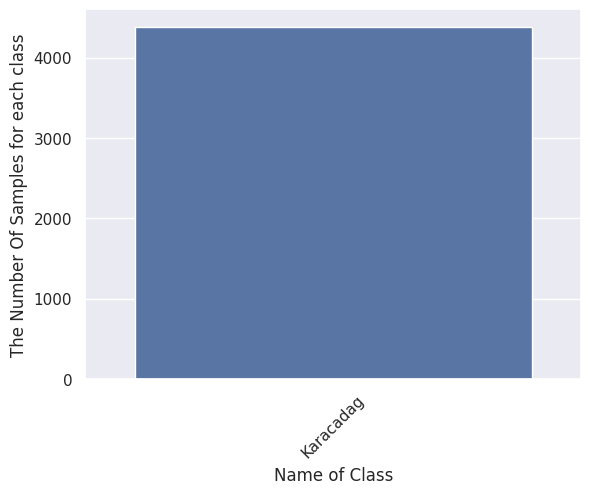

In [59]:
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

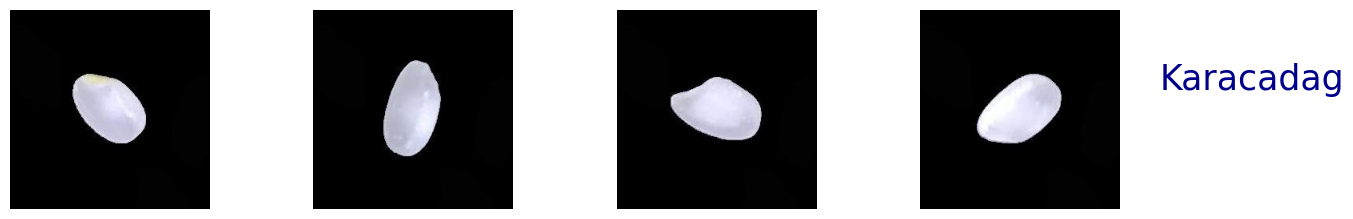

In [60]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]

    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [64]:
from keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3504 validated image filenames belonging to 1 classes.
Found 877 validated image filenames belonging to 1 classes.


In [65]:

input_shape = (50, 50, 3)

In [66]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=20,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=30,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=40, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=50, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=60, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=70, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=80, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


In [67]:
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(5,activation='softmax'))

In [68]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


In [ ]:
h= model.fit_generator(train_generator,epochs=50,  validation_data=train_generator)